## Introduction

Corrosion is a critical issue in industrial applications, especially in the oil and gas sectors, where the degradation of equipment can lead to costly repairs and hazardous conditions. Predicting corrosion rates accurately allows industries to take preventive measures, improving safety and reducing maintenance costs.

In this project, we analyze a dataset containing various chemical compositions and environmental factors to predict the corrosion rate. The dataset includes features such as concentrations of different chemicals (MDEA, DEA, MEA, PZ), pH levels, conductivity, and temperature. Our goal is to predict the corrosion rate using machine learning models.



## Import Libraries

In [1]:
#Import libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings 
warnings.simplefilter("ignore")

## Load Data

In [2]:
#Load data 
data = pd.read_csv("/kaggle/input/corrosion-rate-dataset/Dataset.csv")
data.drop(["No"],axis=1,inplace=True)
data.head()

,Type,MDEA,DEA,MEA,PZ,Total,pH,Conductivity,Temperature,Corrosion rate
0,Lean,25,0,0,0,25,8.44,2.48,80,0.01541
1,Lean,20,5,0,0,25,8.54,2.71,80,0.02296
2,Lean,15,10,0,0,25,8.59,2.85,80,0.02785
3,Lean,30,0,0,0,30,8.46,2.57,80,0.01706
4,Lean,25,5,0,0,30,8.70,2.91,80,0.03056


### Dataset Overview

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            114 non-null    object 
 1   MDEA            114 non-null    int64  
 2   DEA             114 non-null    int64  
 3   MEA             114 non-null    int64  
 4   PZ              114 non-null    int64  
 5   Total           114 non-null    int64  
 6   pH              114 non-null    float64
 7   Conductivity    114 non-null    float64
 8   Temperature     114 non-null    int64  
 9   Corrosion rate  114 non-null    float64
dtypes: float64(3), int64(6), object(1)
memory usage: 9.0+ KB


### Statistical Summary of Data

In [4]:
data.describe()

,MDEA,DEA,MEA,PZ,Total,pH,Conductivity,Temperature,Corrosion rate
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.0,114.000000
mean,28.947368,2.456140,2.456140,2.456140,36.315789,9.021053,7.263333,80.0,0.076653
std,7.742358,4.899233,4.899233,4.899233,7.072714,0.971653,4.244543,0.0,0.041699
min,15.000000,0.000000,0.000000,0.000000,25.000000,7.700000,2.480000,80.0,0.015410
25%,25.000000,0.000000,0.000000,0.000000,30.000000,8.342500,3.300000,80.0,0.042673
50%,30.000000,0.000000,0.000000,0.000000,35.000000,8.750000,5.610000,80.0,0.071100
75%,35.000000,0.000000,0.000000,0.000000,45.000000,9.522500,11.580000,80.0,0.109005
max,45.000000,20.000000,20.000000,20.000000,45.000000,11.650000,13.950000,80.0,0.160060


### Convert Categorical to Numerical

In [5]:
#convert categorical to numerical by using dictionary 
print(data["Type"].unique())
data["Type"] = data["Type"].map({"Lean":"0","Rich":"1"})
print(data["Type"].unique())

['Lean' 'Rich']
['0' '1']


In [6]:
#Dorp Temperature Feature 
data=data.drop(columns=["Temperature"])
data.head(5)

,Type,MDEA,DEA,MEA,PZ,Total,pH,Conductivity,Corrosion rate
0,0,25,0,0,0,25,8.44,2.48,0.01541
1,0,20,5,0,0,25,8.54,2.71,0.02296
2,0,15,10,0,0,25,8.59,2.85,0.02785
3,0,30,0,0,0,30,8.46,2.57,0.01706
4,0,25,5,0,0,30,8.70,2.91,0.03056


**We can use a heatmap to visualize the correlation between the features in the dataset. This helps identify which features are highly correlated with each other or with the target variable.**

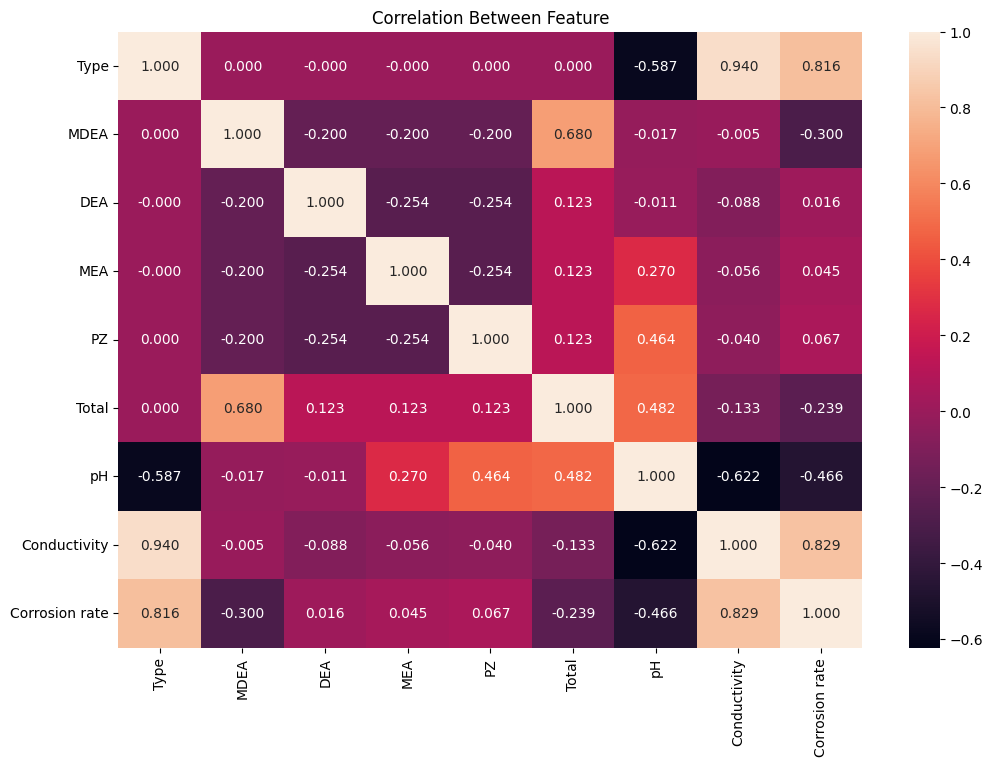

In [7]:
#show correlation between feature
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,fmt=".3f")
plt.title("Correlation Between Feature")
plt.show()

In [8]:
#split data to X,y
X = data.drop(columns=["Corrosion rate","DEA","MEA","PZ"])
y = data["Corrosion rate"]
print("shape of X is:" ,X.shape)
print("shape of y is:",y.shape)

shape of X is: (114, 5)
shape of y is: (114,)


In [9]:
#normalization to data 
norm = StandardScaler()
X = norm.fit_transform(X)

### Correlation Analysis:
- Conductivity showed a strong **positive correlation** with the corrosion rate.

- Solution pH demonstrated a **negative correlation** with the corrosion rate.

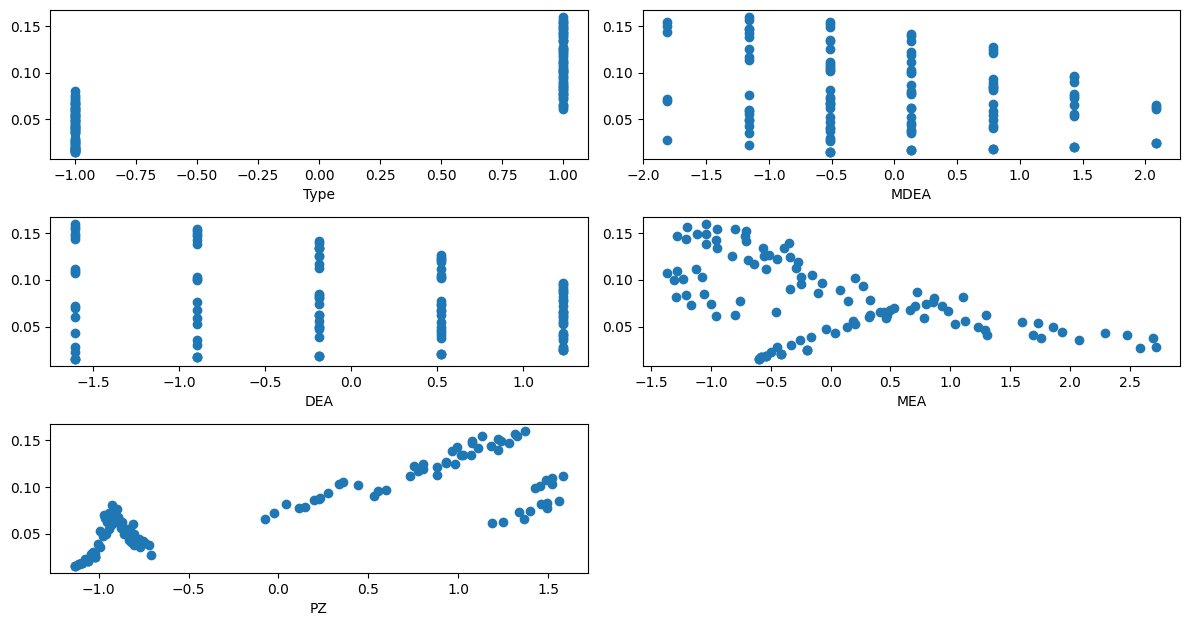

In [10]:
#to show correlation parameter with Corrosion rate 
Feature_name = data.columns.tolist()
plt.figure(figsize=(12,8))
for i in range (X.shape[1]):
    plt.subplot(4,2,i+1)
    plt.scatter(X[:,i],y)
    plt.xlabel(f"{Feature_name[i]}")
plt.tight_layout()
plt.show()

### Splitting Data

In [11]:
#Splitting data 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,shuffle=True,random_state=42)
print("shape of X_5_feature_train is:",X_train.shape)
print("shape of y_5_feature_train is:",y_train.shape)
print("shape of X_5_feature_test is:",X_test.shape)
print("shape of y_5_feature_test is:",y_test.shape)

shape of X_5_feature_train is: (102, 5)
shape of y_5_feature_train is: (102,)
shape of X_5_feature_test is: (12, 5)
shape of y_5_feature_test is: (12,)


In [12]:
### Mean Absolute Relative Difference (MARD) Calculation
def calculate_mard(y_true,y_pred):
    return np.abs((y_true - y_pred)/y_true)*100

In [13]:
### MARD Statistics Calculation
def calculate_mard_statistics(mard_values):
    # Mean
    mean_value = np.mean(mard_values)
    
    # Standard Deviation
    std_dev = np.std(mard_values)
    
    # Minimum
    min_value = np.min(mard_values)
    
    # Maximum
    max_value = np.max(mard_values)
    
    # Square Error (Mean Squared Error)
    square_error = np.mean(np.square(mard_values))
    
    return mean_value, std_dev, min_value, max_value, square_error

## Physics-Informed Neural Network (PINN) Model Definition

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam

X = data.drop(columns=["Corrosion rate", "DEA", "MEA", "PZ"])
y = data["Corrosion rate"].values  # Ensure y is a NumPy array

# Convert features and target to tensors
X_train_PINN = tf.convert_to_tensor(X.values, dtype=tf.float32)
y_train_PINN = tf.convert_to_tensor(y, dtype=tf.float32)

# Define the PINN model
class PINN_Model(Model):
    def __init__(self, input_shape):
        super(PINN_Model, self).__init__()
        self.dense1 = layers.Dense(64, activation='relu')
        self.dense2 = layers.Dense(64, activation='relu')
        self.dense3 = layers.Dense(1)  # Output layer
        
    def call(self, X):
        x = self.dense1(X)
        x = self.dense2(x)
        return self.dense3(x)

# Example physical equation: Fick's Law for diffusion (corrosion example)
def physical_equation(model, X):
    with tf.GradientTape() as tape:
        tape.watch(X)
        y_pred = model(X)  # Get model predictions
    dy_dx = tape.gradient(y_pred, X)  # Compute the gradient
    physics_residual = dy_dx + 0.1 * y_pred  # Example differential equation
    return physics_residual

# Custom loss function combining data and physics
def pinn_loss(y_true, y_pred, model, X):
    data_loss = tf.reduce_mean(tf.square(y_true - y_pred))  # Mean Squared Error
    physics_loss = tf.reduce_mean(tf.square(physical_equation(model, X)))
    return data_loss + physics_loss

# Initialize PINN model
pinn_model = PINN_Model(input_shape=X_train_PINN.shape[1])

# Compile the model with custom loss
pinn_model.compile(optimizer=Adam(learning_rate=0.01), 
                   loss=lambda y_true, y_pred: pinn_loss(y_true, y_pred, pinn_model, X_train_PINN))

# Train the model
history = pinn_model.fit(X_train_PINN, y_train_PINN, epochs=100, verbose=1, 
                         validation_split=0.2)

# Evaluate the model
y_pred = pinn_model.predict(X_test)

MSE = mean_squared_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
print("------------------------------------")
print(f"Mean_Squared_Error is:      {MSE}\nMean_Absolute_Error is:     {MAE}")

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 39.7714 - val_loss: 15.9969
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 23.8466 - val_loss: 17.1724
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.0702 - val_loss: 4.4287
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.1609 - val_loss: 8.7658
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.7149 - val_loss: 0.4996
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4606 - val_loss: 1.6425
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.7858 - val_loss: 3.1988
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.4952 - val_loss: 1.2864
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.7366 - val_loss: 0.0361
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0769 - val_loss: 0.3879
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5916 - val_loss: 0.5942
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6408 - va

### Hyperparameter Tuning with Grid Search

In [15]:
param_grid = {
    'hidden_layer_sizes': [(12,), (10,), (8,)],
    'activation': ['tanh', 'relu'], 
    'solver': ['lbfgs', 'adam'],  
    'learning_rate_init': [0.001, 0.01, 0.1],  
    'alpha': [0.0001, 0.001, 0.01],  # Regularization 
    'max_iter': [500, 1000] 
}

# Initialize MLPRegressor model
MLP = MLPRegressor(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(MLP, param_grid, cv=5, n_jobs=-1)  
grid_search.fit(X_train, y_train)

# Print the best parameters found by grid search
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (8,), 'learning_rate_init': 0.001, 'max_iter': 500, 'solver': 'lbfgs'}


## Artificial Neural Networks (ANNs)

In [16]:
### Applying the Optimized Neural Network Model
NNModel = MLPRegressor(hidden_layer_sizes=(8,), activation='relu',alpha=0.01,learning_rate_init=0.001, solver='lbfgs', max_iter=500,random_state=42)
NNModel.fit(X_train,y_train)
print(f"The score for train Model: {NNModel.score(X_train,y_train)}")
print(f"The score for test Model: {NNModel.score(X_test,y_test)}")

The score for train Model: 0.9840556017385297
The score for test Model: 0.9757235632574235


In [17]:
## Predictions and Evaluation Metrics

y_pred_train = NNModel.predict(X_train)
y_pred_test = NNModel.predict(X_test)
MSE = mean_squared_error(y_test,y_pred_test)
MAE = mean_absolute_error(y_test,y_pred_test)
print(f"Mean_Squared_Error is:      {MSE}\nMean_Absolute_Error is:     {MAE}")
mard_training = calculate_mard(y_train,y_pred_train)
mard_testing = calculate_mard(y_test,y_pred_test)
    
# Calculate statistics for Training data
mean_train, std_dev_train, min_train, max_train, square_error_train = calculate_mard_statistics(mard_training)

# Calculate statistics for Testing data
mean_test, std_dev_test, min_test, max_test, square_error_test = calculate_mard_statistics(mard_testing)

# Output the results for Training data
print(f"Training Data:\nMean: {mean_train}\nStandard Deviation: {std_dev_train}\nMinimum: {min_train}\nMaximum: {max_train}")
print(f"Square Error (MSE): {square_error_train}")
print("______________________________________")
# Output the results for Testing data
print(f"\nTesting Data:\nMean: {mean_test}\nStandard Deviation: {std_dev_test}\nMinimum: {min_test}\nMaximum: {max_test}")
print(f"Square Error (MSE): {square_error_test}")

Mean_Squared_Error is:      3.799391824542514e-05
Mean_Absolute_Error is:     0.004361953978267779
Training Data:
Mean: 6.511214518296404
Standard Deviation: 5.778260469145289
Minimum: 0.0034612036807925273
Maximum: 26.263134616253925
Square Error (MSE): 75.78420855256101
______________________________________

Testing Data:
Mean: 6.3477927779187935
Standard Deviation: 6.0625651061431896
Minimum: 0.5107429888031486
Maximum: 18.676641738855945
Square Error (MSE): 77.04916881762297


In [18]:
##Hyperparameter Tuning with Grid Search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.001, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4] }

grid_search = GridSearchCV(SVR(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'C': 1, 'degree': 2, 'epsilon': 0.001, 'kernel': 'rbf'}


## Support Vector Regression (SVR) Model

In [19]:
## Support Vector Regression (SVR) Model Training and Evaluation
SVRModel = SVR(kernel='rbf', C=1,degree=2, epsilon=.01)
SVRModel.fit(X_train,y_train)
print(f"The score for train Model: {SVRModel.score(X_train,y_train)}")
print(f"The score for test Model: {SVRModel.score(X_test,y_test)}")

The score for train Model: 0.968084709694725
The score for test Model: 0.9478245854399212


In [20]:
## Predictions and MARD for SVR Model
y_pred_train = SVRModel.predict(X_train)
y_pred_test = SVRModel.predict(X_test)
MSE = mean_squared_error(y_test,y_pred_test)
MAE = mean_absolute_error(y_test,y_pred_test)
print(f"Mean_Squared_Error is:      {MSE}\nMean_Absolute_Error is:     {MAE}")
mard_training = calculate_mard(y_train,y_pred_train)
mard_testing = calculate_mard(y_test,y_pred_test)
    
# Calculate statistics for Training data
mean_train, std_dev_train, min_train, max_train, square_error_train = calculate_mard_statistics(mard_training)

# Calculate statistics for Testing data
mean_test, std_dev_test, min_test, max_test, square_error_test = calculate_mard_statistics(mard_testing)

# Output the results for Training data
print(f"Training Data:\nMean: {mean_train}\nStandard Deviation: {std_dev_train}\nMinimum: {min_train}\nMaximum: {max_train}")
print(f"Square Error (MSE): {square_error_train}")
MARD = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100 
print(f"Mean_Absolute_Relative_Deviation (MARD): {MARD}") 
print("______________________________________")
# Output the results for Testing data
print(f"\nTesting Data:\nMean: {mean_test}\nStandard Deviation: {std_dev_test}\nMinimum: {min_test}\nMaximum: {max_test}")
print(f"Square Error (MSE): {square_error_test}")
MARD = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100  
print(f"Mean_Absolute_Relative_Deviation (MARD): {MARD}")   

Mean_Squared_Error is:      8.16573064752998e-05
Mean_Absolute_Error is:     0.00781777728670959
Training Data:
Mean: 14.91058301706856
Standard Deviation: 17.06332056800041
Minimum: 0.14428781568121077
Maximum: 62.926400959588136
Square Error (MSE): 513.4823947152393
Mean_Absolute_Relative_Deviation (MARD): 14.910583017068562
______________________________________

Testing Data:
Mean: 13.889261475451812
Standard Deviation: 12.607705127753862
Minimum: 1.756890209316753
Maximum: 47.17846818255458
Square Error (MSE): 351.8658129218609
Mean_Absolute_Relative_Deviation (MARD): 13.88926147545181


## Mechanistic Model 

In [21]:
## Mechanistic Model and Evaluation
def mechanistic_model(X, params):
    # Simple example using a linear model
    return np.dot(X, params)

# Parameters for the mechanistic model
params = np.random.rand(X_train.shape[1])
y_pred_mech = mechanistic_model(X_test, params)

# Evaluate

MSE = mean_squared_error(y_test,y_pred_mech)
MAE = mean_absolute_error(y_test,y_pred_mech)
print(f"Mean_Squared_Error is:      {MSE}\nMean_Absolute_Error is:     {MAE}")

Mean_Squared_Error is:      1.6474360968325426
Mean_Absolute_Error is:     1.0757893828282323


## Combining ANN and Mechanistic Model

In [22]:
# Combine ANN and Mechanistic Model

# Get predictions from the mechanistic model
y_mech = mechanistic_model(X_test, params)

# Get predictions from the ANN
y_ann = NNModel.predict(X_test).flatten()

# Combine predictions
combined_predictions = (y_ann + y_mech) / 2  # Simple averaging

# Evaluate combined model
MSE = mean_squared_error(y_test,combined_predictions)
MAE = mean_absolute_error(y_test,combined_predictions)
print(f"Mean_Squared_Error is:      {MSE}\nMean_Absolute_Error is:     {MAE}")

Mean_Squared_Error is:      0.4126771739368156
Mean_Absolute_Error is:     0.5384916955657231
